In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [7]:
pwd

'C:\\Users\\Luciano\\Trabajo final UTN\\robo_autos\\curados'

In [89]:
data_total = pd.read_csv('./ULTIMATE_DATASET.csv')

In [97]:
data_total.dropna(inplace=True)

In [98]:
data_total.drop(['Unnamed: 0'], axis=1, inplace=True)

In [99]:
data_total['tramite_tipo'].value_counts()

DENUNCIA DE ROBO O HURTO    59986
COMUNICACIÓN DE RECUPERO     2925
Name: tramite_tipo, dtype: int64

In [100]:
#cambio los valores de la columna tramite_tipo apra que robado sea 0 y recuperado 1
data_total['tramite_tipo'] = data_total['tramite_tipo'].map({'DENUNCIA DE ROBO O HURTO': 0, 'COMUNICACIÓN DE RECUPERO': 1})

In [101]:
data_total = data_total.rename(columns={'tramite_tipo':'recuperados'})

In [102]:
data_total.columns

Index(['recuperados', 'tramite_fecha', 'fecha_inscripcion_inicial',
       'registro_seccional_descripcion', 'registro_seccional_provincia',
       'automotor_origen', 'automotor_anio_modelo',
       'automotor_tipo_descripcion', 'automotor_marca_descripcion',
       'automotor_modelo_descripcion', 'automotor_uso_descripcion',
       'titular_tipo_persona', 'titular_domicilio_localidad',
       'titular_domicilio_provincia', 'titular_genero',
       'titular_anio_nacimiento', 'titular_pais_nacimiento', 'unico_duenio',
       'dia_anio'],
      dtype='object')

In [103]:
data_total.drop(['registro_seccional_descripcion', 'titular_domicilio_localidad',], axis= 1, inplace = True)

In [104]:
data_total['tramite_fecha'] = pd.to_datetime(data_total['tramite_fecha'])
data_total['fecha_inscripcion_inicial'] = pd.to_datetime(data_total['fecha_inscripcion_inicial'])

In [105]:
data_total['dia_robo'] = data_total['tramite_fecha'].apply(lambda x: int(x.isoweekday())) #lunes es 1, domingo 7
data_total['mes_robo'] = data_total['tramite_fecha'].apply(lambda x: int(x.month))
data_total['dia_del_anio'] = data_total['tramite_fecha'].apply(lambda x: int(x.timetuple().tm_yday))
data_total['anio_pat'] = data_total['fecha_inscripcion_inicial'].apply(lambda x: int(x.year))

In [106]:
data_total['tit_radicado'] = ((data_total['registro_seccional_provincia']).apply(lambda x: x.upper()) == data_total['titular_domicilio_provincia']).astype(int)

In [107]:
data_total.drop(['tramite_fecha', 'fecha_inscripcion_inicial', 'titular_domicilio_provincia'], axis = 1, inplace= True)

In [108]:
data_total.head(3)

,recuperados,registro_seccional_provincia,automotor_origen,automotor_anio_modelo,automotor_tipo_descripcion,automotor_marca_descripcion,automotor_modelo_descripcion,automotor_uso_descripcion,titular_tipo_persona,titular_genero,titular_anio_nacimiento,titular_pais_nacimiento,unico_duenio,dia_anio,dia_robo,mes_robo,dia_del_anio,anio_pat,tit_radicado
0,0,Buenos Aires,Nacional,2000.0,SEDAN 4 P,CHEVROLET,CORSA,Privado,Física,Masculino,1981.0,ARGENTINA,1,17,3,1,17,2000,1
1,0,Buenos Aires,Nacional,2007.0,FURGON,PEUGEOT,PARTNER,Privado,Física,Femenino,1990.0,ARGENTINA,1,3,3,1,3,2007,1
2,0,Buenos Aires,Nacional,1995.0,SEDAN 4 P,RENAULT,RENAULT 19,Privado,Física,Masculino,1986.0,ARGENTINA,1,12,5,1,12,1995,1


In [109]:
prov_dummie= pd.get_dummies(data_total.registro_seccional_provincia)
origen_dummie= pd.get_dummies(data_total.automotor_origen)
tipo_dummie= pd.get_dummies(data_total.automotor_tipo_descripcion)
marca_dummie= pd.get_dummies(data_total.automotor_marca_descripcion)
modelo_dummie= pd.get_dummies(data_total.automotor_modelo_descripcion)
uso_dummie= pd.get_dummies(data_total.automotor_uso_descripcion)
pais_tit_dummie = pd.get_dummies(data_total.titular_pais_nacimiento)
# MARCA NO LA NECESITAMOS, CON MODELO YA TENÉS MARCA

In [110]:
tipo_dummie = tipo_dummie.rename(columns={'PICK UP':'PICK UP tipo'})

In [111]:
marca_dummie = marca_dummie.rename(columns={'A.F.F.':'A.F.F. marca', 'PICK UP':'PICK UP marca', 'JEEP':'JEEP marca', 'RENAULT':'RENAULT marca'})


In [112]:
data_total['titular_pers_fisica'] = np.where(data_total['titular_tipo_persona'] == 'Física', 1, 0)

In [113]:
data_total['titular_masculino'] = np.where(data_total['titular_genero'] == 'Masculino', 1, 0)

In [114]:
data_total = data_total.join([prov_dummie, origen_dummie, tipo_dummie,  modelo_dummie, uso_dummie, pais_tit_dummie, marca_dummie]) #marca_dummie,

In [115]:
data_total.drop(['registro_seccional_provincia', 'automotor_origen', 'automotor_uso_descripcion','automotor_tipo_descripcion',
        'automotor_marca_descripcion', 'automotor_modelo_descripcion','titular_pais_nacimiento', 
       'titular_tipo_persona', 'titular_genero'], axis= 1, inplace = True)

In [116]:
x = data_total.drop('recuperados', axis = 1)
y = data_total.recuperados

In [117]:
x.drop(['titular_pers_fisica'], axis=1, inplace= True)

In [118]:
np.where(np.isnan(x))

(array([], dtype=int64), array([], dtype=int64))

In [119]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)

librerias random forest

In [124]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

In [121]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2,
                              random_state=0, max_features='sqrt', criterion='gini')
clf.fit(xtrain, ytrain)  
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [122]:
ypred = clf.predict(xtest)

In [123]:
score1 = clf.score(xtest, ytest)
print(score1)

0.9530041326692805


In [125]:
cm_rf = confusion_matrix(ytest, ypred)
print(cm_rf)

[[17987     0]
 [  887     0]]


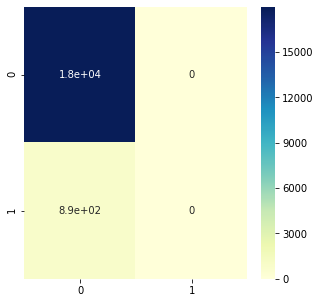

In [127]:
df_cm_rf = pd.DataFrame(cm_rf, index = [i for i in np.unique(y)],columns = [i for i in np.unique(y)])
plt.figure(figsize = (5,5))
sns.heatmap(df_cm_rf, annot=True, cmap="YlGnBu")
plt.show()

In [128]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(ytest, ypred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5

In [ ]:
#Vamos a ver que pasa variando la cantidad de estimadores

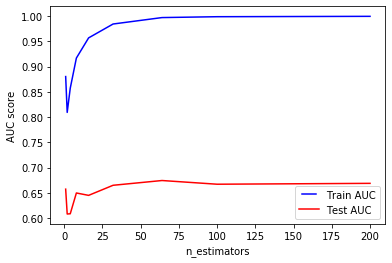

In [132]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rf.fit(xtrain, ytrain)
   train_pred = rf.predict(xtrain)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(ytrain, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(xtest)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(ytest, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

C:\Users\Luciano\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Luciano\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Luciano\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Luciano\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Luciano\Anaconda3\lib\site-packages\sklearn\ensemble\forest

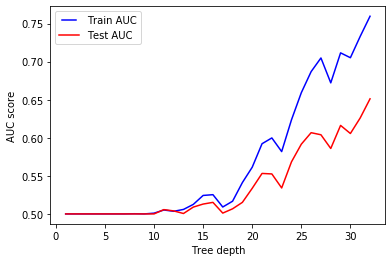

In [134]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
   rf.fit(xtrain, ytrain)
   train_pred = rf.predict(xtrain)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(ytrain, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(xtest)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(ytest, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results,'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

In [ ]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   rf = RandomForestClassifier(min_samples_split=min_samples_split)
   rf.fit(xtrain, ytrain)
   train_pred = rf.predict(xtrain)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(ytrain, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(xtest)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(ytest, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()